In [1]:
import numpy as np
import datetime
import os
import sklearn.metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from scipy.stats import chi
from scipy import stats

############
# Functions
############

# Generate n data for set of thetas
def theta_data(n, thetas, rand=1234):
    m1 = np.zeros(n)
    v1 = np.ones(n)
    m2 = mean_gen(thetas)
    v2 = var_gen(thetas)
    
    x1, y1 = np.transpose(np.array([np.random.normal(m1, v1, size=n), thetas])), np.zeros(n)
    x2, y2 = np.transpose(np.array([np.random.normal(m2, v2, size=n), thetas])), np.ones(n)
    x, y = np.append(x1, x2, axis=0), np.append(y1, y2, axis=0)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = rand)
    
    return x_train, x_test, y_train, y_test

def mean_gen(theta):
    mu = 0.5 - (np.sqrt(2)/2) * np.cos(theta + np.pi / 4)
    return mu

def var_gen(theta):
    v = 1.5 - (np.sqrt(2)/2) * np.sin(theta + np.pi / 4)
    return v

def discrete_thetas(n, m):
    xk = np.arange(m)
    pk = (1 / m) * np.ones(int(m))
    discrete_distr = stats.rv_discrete(name='discrete_distr', values=(xk, pk))
    thetas = discrete_distr.rvs(size=n) / (m / 6)
    return thetas

2022-06-23 11:56:15.380736: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-23 11:56:15.380777: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Uniform Distribution of Thetas

# n = 100000
# rand_n = 1234
# thetas = np.random.uniform(0, 2 * np.pi, n)
# x_train, x_test, y_train, y_test = theta_data(n, thetas, rand_n)

In [3]:
# # Discrete Distribution of Thetas

# n = 100000
# rand_n = 1234
# m = 12
# thetas = discrete_thetas(n, m)
# x_train, x_test, y_train, y_test = theta_data(n, thetas, rand_n)

In [26]:
# Single Theta

n = 100000
rand_n = 1234
theta = 4.5
thetas = theta * np.ones(n)
x_train, x_test, y_train, y_test = theta_data(n, thetas, rand_n)

In [27]:
# Loading Models

names = []
names.append('interpolated_model_cont')
names.append('interpolated_model_discrete12')
names.append('interpolated_model_discrete6')
names.append('interpolated_model_discrete3')
names.append('interpolated_model_discrete2')
names.append('theta2.5')
l = len(names)

models = []
predictions = []
for i in range(l):
    models.append(tf.keras.models.load_model('models/' + names[i]))
    predictions.append(models[i](x_test).numpy())

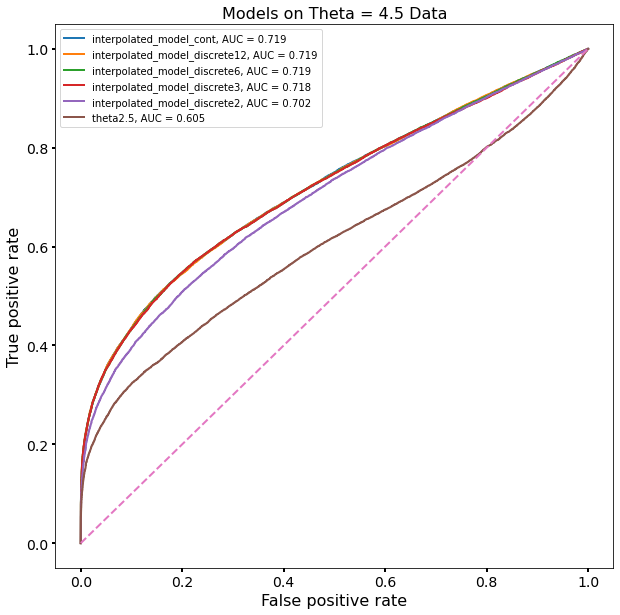

In [28]:
fig, ax1 = plt.subplots(figsize=(10,10))
fontsize=16
minor_size=14

for i in range(l):
    fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, predictions[i])
    auc = sklearn.metrics.auc(fpr, tpr)
    ax1.plot(fpr, tpr, lw=2, label=names[i] + ', AUC = %.3f' % (auc))

ax1.set_xlabel("Score")
ax1.plot([0, 1], [0, 1], '--', lw=2)
ax1.set_xlabel('False positive rate', fontsize=fontsize)
ax1.set_ylabel('True positive rate', fontsize=fontsize)
ax1.set_title('Models on Theta = %.1f Data' % (theta), fontsize=fontsize)
ax1.legend()
ax1.tick_params(width=2, grid_alpha=0.5, labelsize=minor_size)